# Model Building

## 1. Import the Libraries

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
# Load the training and test dataset
x_train = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\9.0 End_to_End_House_Price_Prediction\\Data\\processed_data\\x_trian_clean.csv")
x_test = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\9.0 End_to_End_House_Price_Prediction\\Data\\processed_data\\x_test_clean.csv")

In [3]:
# visualize the training set
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.461171,0.366365,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.75,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.456066,0.388528,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,0.5,0.5,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.75,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.916667,0.75,0.394699,0.336782,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
3,0.750000,0.75,0.445002,0.482280,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.084112,0.5,0.50,0.362482,0.5,0.5,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.636364,0.666667,0.75,1.0,0.0,0.0
4,0.750000,0.75,0.577658,0.391756,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,0.5,0.5,0.333333,0.666667,0.000000,0.6,0.086818,0.0,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.75,0.411215,0.5,0.50,0.406206,0.5,0.5,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


In [4]:
# Load the training and test target
y_train = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\9.0 End_to_End_House_Price_Prediction\\Data\\processed_data\\y_trian_clean.csv")
y_test = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\9.0 End_to_End_House_Price_Prediction\\Data\\processed_data\\y_test_clean.csv")

In [5]:
# visualize the target varaible
y_train.head()

,SalePrice
0,12.211060
1,11.887931
2,12.675764
3,12.278393
4,12.103486


In [6]:
# now let's load the selected features csv file
features = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\9.0 End_to_End_House_Price_Prediction\\Data\\processed_data\\selected_features.csv")

In [7]:
# let's visualize the features 
features.head()

,0
0,MSSubClass
1,MSZoning
2,LotArea
3,LotShape
4,LandContour


In [8]:
# let's convert the features dataframe to a list
features = features["0"].to_list()
features

['MSSubClass',
 'MSZoning',
 'LotArea',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'SaleCondition']

In [9]:
# Now let's reduce the training and testing sets only to the selected features
x_train = x_train[features]
x_test = x_test[features]

In [10]:
# now let's visualize the reduced dataset
x_train.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,PavedDrive,WoodDeckSF,ScreenPorch,SaleCondition
0,0.750000,0.75,0.366365,0.333333,1.000000,0.0,0.863636,0.777778,0.50,0.049180,0.0,1.0,0.666667,1.0,0.666667,0.666667,1.0,1.00,1.0,0.559760,0.0,0.523250,0.000000,0.666667,0.0,0.666667,0.416667,1.0,0.000000,0.0,1.0,0.75,1.0,0.116686,0.0,0.75
1,0.750000,0.75,0.388528,0.333333,0.333333,0.0,0.363636,0.444444,0.75,0.049180,0.0,0.6,0.666667,0.5,0.333333,0.000000,0.8,1.00,1.0,0.434539,0.0,0.406196,0.333333,0.333333,0.5,0.666667,0.250000,1.0,0.000000,0.0,0.5,0.25,1.0,0.000000,0.0,0.75
2,0.916667,0.75,0.336782,0.000000,0.333333,0.0,0.954545,0.888889,0.50,0.098361,1.0,0.3,1.000000,1.0,1.000000,0.000000,1.0,1.00,1.0,0.627205,0.0,0.586296,0.333333,0.666667,0.0,1.000000,0.333333,1.0,0.333333,0.8,0.5,0.50,1.0,0.228705,0.0,0.75
3,0.750000,0.75,0.482280,0.666667,0.666667,0.0,0.454545,0.666667,0.50,0.163934,0.0,1.0,0.666667,1.0,0.666667,1.000000,1.0,1.00,1.0,0.566920,0.0,0.529943,0.333333,0.666667,0.0,0.666667,0.250000,1.0,0.333333,0.4,0.5,0.50,1.0,0.469078,0.0,0.75
4,0.750000,0.75,0.391756,0.333333,0.333333,0.0,0.363636,0.555556,0.50,0.737705,0.0,0.6,0.333333,0.5,0.333333,0.000000,0.6,0.75,1.0,0.549026,0.0,0.513216,0.000000,0.666667,0.0,0.333333,0.416667,1.0,0.333333,0.8,0.5,0.50,1.0,0.000000,0.0,0.75


In [11]:
x_train.shape

(1314, 36)

## 2. Model Training (Lasso Regression)

In [12]:
# let's initialize the lasso model
model = Lasso(alpha = 0.001, random_state = 0)

In [13]:
# let's fit the lasso model with the training set
model.fit(x_train, y_train)

Lasso(alpha=0.001, random_state=0)

## 3. Model Evaluation

In [14]:
# now let's evaluate the model
# first let's predict the training and test sets
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [15]:
# now let's perform model evaluation on the training set
train_mean_sq_error = mean_squared_error(np.exp(y_train), np.exp(train_pred))
train_r2_score = r2_score(np.exp(y_train), np.exp(train_pred))
train_mean_sq_error = mean_squared_error(np.exp(y_train), np.exp(train_pred))
print(f"the training mean squared error is: {train_mean_sq_error}")
print(f"the training r2 score is: {train_r2_score}")

the training mean squared error is: 772198334.5024533
the training r2 score is: 0.8763262128502762


In [16]:
# now let's perform model evaluation on the test set
test_mean_sq_error = mean_squared_error(np.exp(y_test), np.exp(test_pred))
test_r2_score = r2_score(np.exp(y_test), np.exp(test_pred))
print(f"the test mean squared error is: {test_mean_sq_error}")
print(f"the test r2 score is: {test_r2_score}")

the test mean squared error is: 1077066272.4044442
the test r2 score is: 0.843270051872265


In [17]:
# let's make a data frame of the original sale price and pridicted sale price for test set
test_dict = {"Actual": y_test["SalePrice"], "Prediction": test_pred}
comp_df = pd.DataFrame(test_dict)
comp_df

,Actual,Prediction
0,12.209188,12.175793
1,11.798104,11.917238
2,11.608236,11.662980
3,12.165251,12.303104
4,11.385092,11.423063
...,...,...
141,11.884489,11.763792
142,12.287653,12.329463
143,11.921718,11.954652
144,11.598727,11.772995


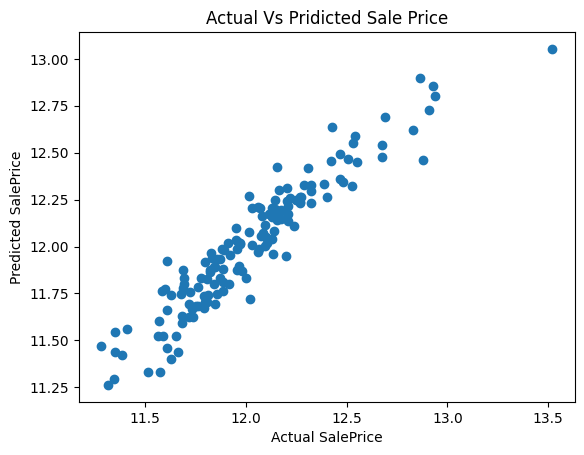

In [18]:
# # let's evaluate our predictions respect to the real sale price using scatter plot
plt.scatter(y_test["SalePrice"], test_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual Vs Pridicted Sale Price")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\9.0 End_to_End_House_Price_Prediction\\reports\\figures\\Actual Vs Pridicted Sale Price.jpg")
plt.show()


We can see that our model is doing a good job at estimating house prices.

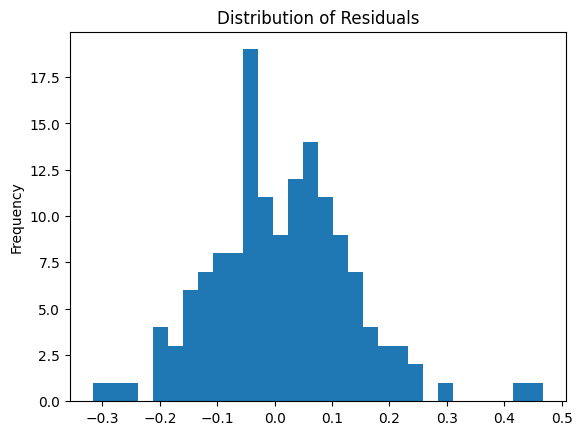

In [19]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed
residuals = y_test["SalePrice"] - test_pred
residuals.plot.hist(bins = 30)
plt.title("Distribution of Residuals")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\9.0 End_to_End_House_Price_Prediction\\reports\\figures\\Distibution of Residuals.jpg")
plt.show()

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

In [20]:
# now let's see the feature importances 
# first lets get the feature coefficients
importance = model.coef_
importance

array([ 3.01466946e-02,  8.07927176e-02,  2.01228558e-01,  1.24616441e-03,
        3.17400983e-04,  1.82665868e-02,  2.46560490e-01,  4.87890790e-01,
        2.79696129e-01, -2.51441560e-02,  1.38742384e-02,  2.38643688e-02,
        2.40698439e-02,  3.66183906e-02,  7.90210591e-02,  4.69541392e-02,
        6.44372230e-02,  4.12345530e-02,  6.92744859e-02,  3.08229277e-01,
        6.02240500e-03,  8.43781392e-01,  8.73711994e-02,  1.01981366e-02,
        4.14920529e-02,  8.35676637e-02,  2.79604322e-02,  5.98406853e-02,
        5.29646921e-03,  5.94069325e-02,  1.26665083e-02,  1.79750182e-01,
        2.45293288e-02,  3.92689437e-02,  3.59451684e-02,  1.21384113e-01])

In [21]:
# now let's get the feature names
features = model.feature_names_in_
features

array(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF',
       'ScreenPorch', 'SaleCondition'], dtype=object)

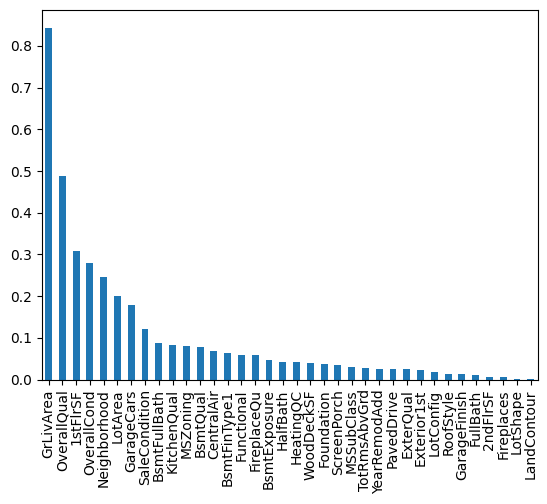

In [25]:
# now let's plot the bar plot of feature importnces
np.abs(pd.Series(importance, index = features)).sort_values(ascending=False).plot.bar()
plt.show()

## 4. Saving the Model

In [26]:
# to score a new data in the next step we need to save our model
joblib.dump(model,"C:\\Users\\yozil\\Desktop\\My projects\\9.0 End_to_End_House_Price_Prediction\\models\\Lasso_Model.joblib" )

['C:\\Users\\yozil\\Desktop\\My projects\\9.0 End_to_End_House_Price_Prediction\\models\\Lasso_Model.joblib']